# Exercise 2

## Instructions 

1. Generate train and test data.
2. Define a class NN of one-hidden neural net. The __init__ function takes 3 parameters (inputsize, hiddensize, outputsize).

2. Define a list hidden_size = [2, ...., 33, ....128] with a step 5. Be sure that list contains 33, which corresponds to the case of interpolation threshold, i.e. the number of parameters equals to the number of training points.
3. 

for h in hidden_size:
    define model(inputsize, hiddensize, outputsize)
    for e in epochs:
        forward step: output = model(input)
        compute loss 
        backpropagate loss (use backward)
        
    get train loss (after training): train_out = model(input)
    train_loss = criterion(train_out, labels)
    get test_loss: test_out = model(input)
    test_loss = criterion(test_out, labels)
       
4. Plot saved list of train and test losses, x axis reveals each h, y axis is loss values.
     

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import multivariate_normal
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import csv
import torch
from torch.autograd import Variable
import torch.nn as nn
from sklearn import datasets
from sklearn.model_selection import train_test_split

np.random.seed(1234)

In [2]:
x_values = np.random.normal(size = 200)
x_vals = np.array(x_values, dtype=np.float32)
r = np.random.normal(0, 3, size = 200)

y_values = [3*i + 5 for i in x_values] + r
y_vals = np.array(y_values, dtype=np.float32)


In [3]:
x_train, x_test, y_train, y_test = (train_test_split(x_vals, y_vals, test_size=0.2))

In [4]:
x_train = (x_train).reshape(-1, 1)
x_test = (x_test).reshape(-1, 1)
y_train = (y_train).reshape(-1, 1)
y_test = (y_test).reshape(-1, 1)

In [5]:
x_train.shape

(160, 1)

In [6]:
print(x_train.shape)
print(y_train.shape)

(160, 1)
(160, 1)


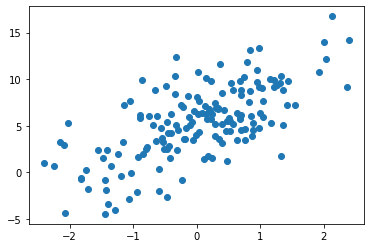

In [7]:
plt.scatter(x_train, y_train)

In [8]:
class NN(torch.nn.Module):
    def __init__(self, inputSize, hiddenSize, outputSize):
        super(NN, self).__init__()
        self.linear = nn.Sequential(torch.nn.Linear(inputSize, hiddenSize),
                                    torch.nn.Linear(hiddenSize, outputSize))
                                    

    def forward(self, x):
        out = self.linear(x)
        return out

In [9]:
inputDim = 1
hidden_sizes = 128
outputDim = 1      
learningRate = 0.001 
epochs = 101



In [10]:
criterion = torch.nn.MSELoss() 

In [20]:
#!!! Note that training in the code below done outside of epoch loop.
hs = []
train_losses = []
test_losses = []
for h in range(2, hidden_sizes, 1):
    hs.append(h)
    model = NN(inputDim, h, outputDim)
    optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)
    for epoch in range(epochs):
        if torch.cuda.is_available():
            inputs_train = Variable(torch.from_numpy(x_train).cuda())
            labels_train = Variable(torch.from_numpy(y_train).cuda())
        else:
            inputs_train = Variable(torch.from_numpy(x_train))
            labels_train = Variable(torch.from_numpy(y_train))
        if torch.cuda.is_available():
            inputs_test = Variable(torch.from_numpy(x_test).cuda())
            labels_test = Variable(torch.from_numpy(y_test).cuda())
        else:
            inputs_test = Variable(torch.from_numpy(x_test))
            labels_test = Variable(torch.from_numpy(y_test))
        optimizer.zero_grad()
        outputs = model(inputs_train)
        loss = criterion(outputs, labels_train)
        loss.backward()
        optimizer.step()
        if epoch % 50 == 0:
            print('h: {} | epoch: {}, loss: {}'.format(h, epoch, loss.item()))  
    outputs_train = model(inputs_train)
    train_loss = criterion(inputs_train, labels_train)
    train_losses.append(train_loss)
    outputs_test = model(inputs_test)
    test_loss = criterion(inputs_test, labels_test)
    test_losses.append(test_loss)

h: 2 | epoch: 0, loss: 46.66217041015625
h: 2 | epoch: 50, loss: 35.861759185791016
h: 2 | epoch: 100, loss: 23.60149574279785
h: 3 | epoch: 0, loss: 42.599403381347656
h: 3 | epoch: 50, loss: 20.34744644165039
h: 3 | epoch: 100, loss: 10.889514923095703
h: 4 | epoch: 0, loss: 41.765716552734375
h: 4 | epoch: 50, loss: 27.003503799438477
h: 4 | epoch: 100, loss: 16.428096771240234
h: 5 | epoch: 0, loss: 49.22309875488281
h: 5 | epoch: 50, loss: 31.464801788330078
h: 5 | epoch: 100, loss: 18.74629783630371
h: 6 | epoch: 0, loss: 51.87255859375
h: 6 | epoch: 50, loss: 26.910547256469727
h: 6 | epoch: 100, loss: 13.874338150024414
h: 7 | epoch: 0, loss: 43.19805145263672
h: 7 | epoch: 50, loss: 23.649572372436523
h: 7 | epoch: 100, loss: 13.069067001342773
h: 8 | epoch: 0, loss: 43.209877014160156
h: 8 | epoch: 50, loss: 24.613428115844727
h: 8 | epoch: 100, loss: 12.9339017868042
h: 9 | epoch: 0, loss: 44.25224304199219
h: 9 | epoch: 50, loss: 26.414987564086914
h: 9 | epoch: 100, loss: 

h: 66 | epoch: 100, loss: 8.550302505493164
h: 67 | epoch: 0, loss: 42.88895797729492
h: 67 | epoch: 50, loss: 8.740864753723145
h: 67 | epoch: 100, loss: 8.550801277160645
h: 68 | epoch: 0, loss: 43.62236022949219
h: 68 | epoch: 50, loss: 8.870248794555664
h: 68 | epoch: 100, loss: 8.552288055419922
h: 69 | epoch: 0, loss: 44.53953552246094
h: 69 | epoch: 50, loss: 8.778243064880371
h: 69 | epoch: 100, loss: 8.55119800567627
h: 70 | epoch: 0, loss: 39.531253814697266
h: 70 | epoch: 50, loss: 9.056614875793457
h: 70 | epoch: 100, loss: 8.555925369262695
h: 71 | epoch: 0, loss: 51.64796829223633
h: 71 | epoch: 50, loss: 9.35888385772705
h: 71 | epoch: 100, loss: 8.561914443969727
h: 72 | epoch: 0, loss: 43.24747085571289
h: 72 | epoch: 50, loss: 8.625143051147461
h: 72 | epoch: 100, loss: 8.54999828338623
h: 73 | epoch: 0, loss: 41.03076171875
h: 73 | epoch: 50, loss: 8.66767692565918
h: 73 | epoch: 100, loss: 8.550271034240723
h: 74 | epoch: 0, loss: 46.67884063720703
h: 74 | epoch: 50

In [21]:
with torch.no_grad(): 
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)

[[ 8.754229  ]
 [ 3.191471  ]
 [ 4.046038  ]
 [ 5.9255576 ]
 [ 7.975143  ]
 [ 0.69024026]
 [ 8.885903  ]
 [ 4.985613  ]
 [ 6.3820195 ]
 [ 6.7657127 ]
 [ 3.468689  ]
 [ 3.303938  ]
 [ 7.589898  ]
 [ 3.9309459 ]
 [ 4.7510543 ]
 [ 3.1390328 ]
 [ 7.9771204 ]
 [ 9.187587  ]
 [ 7.0143876 ]
 [ 4.033291  ]
 [ 1.5248362 ]
 [ 0.4028564 ]
 [ 5.651797  ]
 [ 3.541445  ]
 [ 1.1330533 ]
 [ 4.0495186 ]
 [ 4.711803  ]
 [ 8.142067  ]
 [ 5.16141   ]
 [ 7.043736  ]
 [ 1.3325212 ]
 [ 6.21808   ]
 [ 5.6452026 ]
 [ 8.624958  ]
 [ 2.8894637 ]
 [ 2.990803  ]
 [-0.14921461]
 [ 8.495849  ]
 [ 7.4680376 ]
 [ 6.6759877 ]
 [ 7.209375  ]
 [ 6.742747  ]
 [ 5.8965883 ]
 [ 6.5637174 ]
 [ 7.140839  ]
 [ 7.649484  ]
 [-0.4914422 ]
 [ 7.3398213 ]
 [ 8.109257  ]
 [ 4.096156  ]
 [ 5.9282    ]
 [ 3.0160027 ]
 [-0.29443884]
 [ 6.4106984 ]
 [10.742301  ]
 [ 2.9176784 ]
 [ 6.297464  ]
 [ 4.643106  ]
 [ 9.000455  ]
 [ 7.2138476 ]
 [ 0.39887804]
 [ 5.530502  ]
 [ 7.588098  ]
 [ 4.413142  ]
 [ 6.3789554 ]
 [ 4.879083  ]
 [ 5.35710

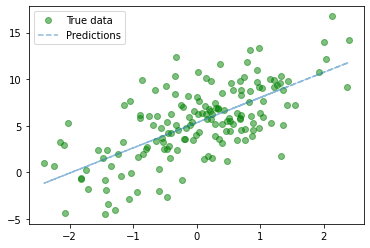

In [22]:
plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

(0.0, 100.0)

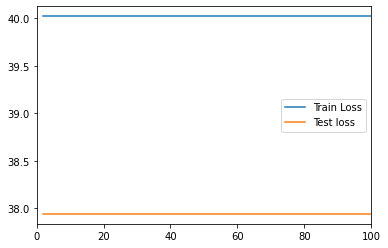

In [23]:
plt.plot(hs, train_losses, label='Train Loss')
plt.plot(hs, test_losses, label='Test loss')
plt.legend(loc='best')
plt.xlim(0, 100)

(0.0, 100.0)

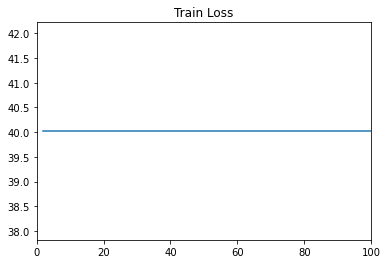

In [24]:
plt.plot(hs, train_losses)
plt.title('Train Loss')
plt.xlim(0, 100)

(0.0, 100.0)

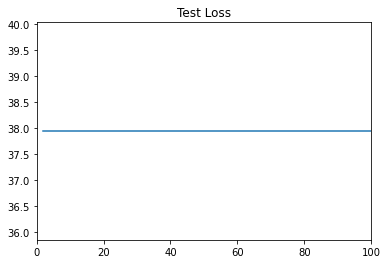

In [25]:
plt.plot(hs, test_losses)
plt.title('Test Loss')
plt.xlim(0, 100)

[]